## San Francisco Crime Classification

https://www.kaggle.com/c/sf-crime

Description:

"From Sunset to SOMA, and Marina to Excelsior, this competition's dataset provides nearly 12 years of crime reports from across all of San Francisco's neighborhoods. Given time and location, you must predict the category of crime that occurred."

## Set Up, Initial Exploration

Imports, set options.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# enables inline plots
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.precision', 3)

Load dataset. Take a look at the columns.


From Kaggle documentation:

Dates - timestamp of the crime incident

Category - category of the crime incident (only in train.csv). This is the target variable you are going to predict.

Descript - detailed description of the crime incident (only in train.csv)

DayOfWeek - the day of the week

PdDistrict - name of the Police Department District

Resolution - how the crime incident was resolved (only in train.csv)

Address - the approximate street address of the crime incident 

X - Longitude

Y - Latitude

In [33]:
df = pd.read_csv('/Users/eloiseheydenrych/Downloads/train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878049 entries, 0 to 878048
Data columns (total 9 columns):
Dates         878049 non-null object
Category      878049 non-null object
Descript      878049 non-null object
DayOfWeek     878049 non-null object
PdDistrict    878049 non-null object
Resolution    878049 non-null object
Address       878049 non-null object
X             878049 non-null float64
Y             878049 non-null float64
dtypes: float64(2), object(7)
memory usage: 67.0+ MB


View first 10 rows.

In [34]:
df.head(10)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.426,37.775
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.426,37.775
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424,37.800
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.427,37.801
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.439,37.772
5,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403,37.713
6,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423,37.725
7,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371,37.728
8,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,RICHMOND,NONE,600 Block of 47TH AV,-122.508,37.777
9,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,CENTRAL,NONE,JEFFERSON ST / LEAVENWORTH ST,-122.419,37.808


Drop Descript and Resolution columns, since those aren't provided in the test data.

In [35]:
del df['Descript']
del df['Resolution']
df.head()

,Dates,Category,DayOfWeek,PdDistrict,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.426,37.775
1,2015-05-13 23:53:00,OTHER OFFENSES,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.426,37.775
2,2015-05-13 23:33:00,OTHER OFFENSES,Wednesday,NORTHERN,VANNESS AV / GREENWICH ST,-122.424,37.800
3,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,NORTHERN,1500 Block of LOMBARD ST,-122.427,37.801
4,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,PARK,100 Block of BRODERICK ST,-122.439,37.772


What are our the different crime categories?

In [36]:
CategoryList = df.Category.unique()
print CategoryList

['WARRANTS' 'OTHER OFFENSES' 'LARCENY/THEFT' 'VEHICLE THEFT' 'VANDALISM'
 'NON-CRIMINAL' 'ROBBERY' 'ASSAULT' 'WEAPON LAWS' 'BURGLARY'
 'SUSPICIOUS OCC' 'DRUNKENNESS' 'FORGERY/COUNTERFEITING' 'DRUG/NARCOTIC'
 'STOLEN PROPERTY' 'SECONDARY CODES' 'TRESPASS' 'MISSING PERSON' 'FRAUD'
 'KIDNAPPING' 'RUNAWAY' 'DRIVING UNDER THE INFLUENCE'
 'SEX OFFENSES FORCIBLE' 'PROSTITUTION' 'DISORDERLY CONDUCT' 'ARSON'
 'FAMILY OFFENSES' 'LIQUOR LAWS' 'BRIBERY' 'EMBEZZLEMENT' 'SUICIDE'
 'LOITERING' 'SEX OFFENSES NON FORCIBLE' 'EXTORTION' 'GAMBLING'
 'BAD CHECKS' 'TREA' 'RECOVERED VEHICLE' 'PORNOGRAPHY/OBSCENE MAT']


How many entries fall into each category?

In [37]:
df.Category.value_counts()

LARCENY/THEFT                174900
OTHER OFFENSES               126182
NON-CRIMINAL                  92304
ASSAULT                       76876
DRUG/NARCOTIC                 53971
VEHICLE THEFT                 53781
VANDALISM                     44725
WARRANTS                      42214
BURGLARY                      36755
SUSPICIOUS OCC                31414
                              ...  
EMBEZZLEMENT                   1166
SUICIDE                         508
FAMILY OFFENSES                 491
BAD CHECKS                      406
BRIBERY                         289
EXTORTION                       256
SEX OFFENSES NON FORCIBLE       148
GAMBLING                        146
PORNOGRAPHY/OBSCENE MAT          22
TREA                              6
Name: Category, dtype: int64

What days of the week did most of the crimes occur on?

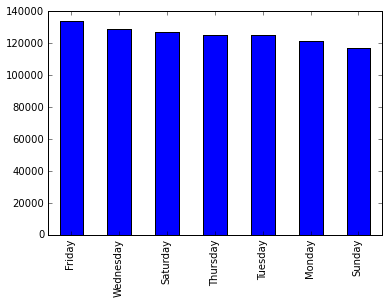

In [39]:
df['DayOfWeek'].value_counts().plot(kind = 'bar')

How are the crime entries distributed across the police districts?

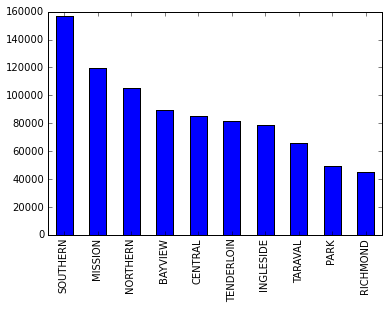

In [40]:
df['PdDistrict'].value_counts().plot('bar')

# Date Column
Use pd.to_datetime() to explicitly cast strings in our Date column.

In [41]:
df['Dates'] = pd.to_datetime(df['Dates'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878049 entries, 0 to 878048
Data columns (total 7 columns):
Dates         878049 non-null datetime64[ns]
Category      878049 non-null object
DayOfWeek     878049 non-null object
PdDistrict    878049 non-null object
Address       878049 non-null object
X             878049 non-null float64
Y             878049 non-null float64
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 53.6+ MB


Use datetime method to create an Hour feature. Note that we already have a DayOfWeek column. Drop Dates column for now, but note that it may be interesting to come back and try some different Dates-based features, like Month or Season, as there may be seasonal variation in crimes. Features like IsWorkday or IsBusinessHours may also be interesting.

In [42]:
df['Hour'] = df.Dates.dt.hour
del df['Dates']
df.head()

,Category,DayOfWeek,PdDistrict,Address,X,Y,Hour
0,WARRANTS,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.426,37.775,23
1,OTHER OFFENSES,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.426,37.775,23
2,OTHER OFFENSES,Wednesday,NORTHERN,VANNESS AV / GREENWICH ST,-122.424,37.800,23
3,LARCENY/THEFT,Wednesday,NORTHERN,1500 Block of LOMBARD ST,-122.427,37.801,23
4,LARCENY/THEFT,Wednesday,PARK,100 Block of BRODERICK ST,-122.439,37.772,23


How are crimes distributed by hour of day?

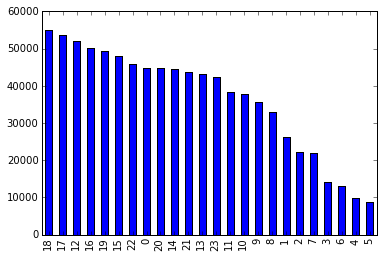

In [43]:
df['Hour'].value_counts().plot('bar')

# Dummy Variables
Create a new temporary dataframe by calling get_dummies() on the DayOfWeek column to create dummy variables for each of the 7 values. Then, merge the new dummy columns into the original dataset and get rid of the original DayOfWeek column which we no longer need. We're going to treat Friday as our baseline and exclude it from our fit, to prevent multicollinearity. Repeat process for PdDistrict (where we drop the Southern district) and for Hour of Day (where we drop hour 18).

In [44]:
dummy_DayOfWeek = pd.get_dummies(df['DayOfWeek'], prefix='Day')
del dummy_DayOfWeek['Day_Friday']
del df['DayOfWeek']
df = df.join(dummy_DayOfWeek)
dummy_PdDistrict = pd.get_dummies(df['PdDistrict'], prefix='District')
del dummy_PdDistrict['District_SOUTHERN']
del df['PdDistrict']
df = df.join(dummy_PdDistrict)
dummy_Hour = pd.get_dummies(df['Hour'], prefix='Hour')
del dummy_Hour['Hour_18']
del df['Hour']
df = df.join(dummy_Hour)

df.head()

,Category,Address,X,Y,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,District_BAYVIEW,District_CENTRAL,District_INGLESIDE,District_MISSION,District_NORTHERN,District_PARK,District_RICHMOND,District_TARAVAL,District_TENDERLOIN,Hour_0,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,WARRANTS,OAK ST / LAGUNA ST,-122.426,37.775,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,OTHER OFFENSES,OAK ST / LAGUNA ST,-122.426,37.775,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,OTHER OFFENSES,VANNESS AV / GREENWICH ST,-122.424,37.800,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,LARCENY/THEFT,1500 Block of LOMBARD ST,-122.427,37.801,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,LARCENY/THEFT,100 Block of BRODERICK ST,-122.439,37.772,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


Take a closer look at the Address column.

In [45]:
AddressList = df.Address.unique()
print len(AddressList)
print df.Address.value_counts()

23228
800 Block of BRYANT ST          26533
800 Block of MARKET ST           6581
2000 Block of MISSION ST         5097
1000 Block of POTRERO AV         4063
900 Block of MARKET ST           3251
0 Block of TURK ST               3228
0 Block of 6TH ST                2884
300 Block of ELLIS ST            2703
400 Block of ELLIS ST            2590
16TH ST / MISSION ST             2504
                                ...  
ULLOA ST / 38TH AV                  1
BROOKLYN PL / SACRAMENTO ST         1
DE BOOM ST / 2ND ST                 1
EXECUTIVE PARK BL / ALANA WY        1
CALIFORNIA ST / 20TH AV             1
2600 Block of TARAVAL ST            1
0 Block of PALOALTO AV              1
ALEMANY BL / RAMSELL ST             1
2800 Block of MARKET ST             1
KRAMER PL / GREENWICH ST            1
Name: Address, dtype: int64


There are 23228 different addresses in our data, making this column difficult to work with (dummy variables infeasible, for example). Additionally, the information is mostly already captured in the longitude and latitude columns (X and Y). So, take the Address column out of our data, at least for now.

In [46]:
del df['Address']
df.head()

,Category,X,Y,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,District_BAYVIEW,District_CENTRAL,District_INGLESIDE,District_MISSION,District_NORTHERN,District_PARK,District_RICHMOND,District_TARAVAL,District_TENDERLOIN,Hour_0,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,WARRANTS,-122.426,37.775,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,OTHER OFFENSES,-122.426,37.775,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,OTHER OFFENSES,-122.424,37.800,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,LARCENY/THEFT,-122.427,37.801,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,LARCENY/THEFT,-122.439,37.772,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## Target Vector and Feature Matrix

In [47]:
#target vector y
y = df['Category']
y.head()

0          WARRANTS
1    OTHER OFFENSES
2    OTHER OFFENSES
3     LARCENY/THEFT
4     LARCENY/THEFT
Name: Category, dtype: object

In [48]:
#Matrix of X's.
X = df
del X['Category']
X.head()

,X,Y,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,District_BAYVIEW,District_CENTRAL,District_INGLESIDE,District_MISSION,District_NORTHERN,District_PARK,District_RICHMOND,District_TARAVAL,District_TENDERLOIN,Hour_0,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,-122.426,37.775,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,-122.426,37.775,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,-122.424,37.800,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,-122.427,37.801,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,-122.439,37.772,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## k-Nearest Neighbors

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

Use grid search to find the optimal value of k.

In [19]:
from sklearn.grid_search import GridSearchCV
k_range = range(1, 51, 2)
param_grid = {'n_neighbors' : k_range}
grid = GridSearchCV(knn, param_grid, n_jobs=4)
grid.fit(X, y)
print grid.grid_scores_
print grid.best_score_
print grid.best_estimator_
print grid.best_params_

[mean: 0.15669, std: 0.00171, params: {'n_neighbors': 1}, mean: 0.16680, std: 0.00172, params: {'n_neighbors': 3}, mean: 0.26064, std: 0.11041, params: {'n_neighbors': 5}, mean: 0.35421, std: 0.02884, params: {'n_neighbors': 7}, mean: 0.29167, std: 0.07693, params: {'n_neighbors': 9}, mean: 0.32115, std: 0.03272, params: {'n_neighbors': 11}, mean: 0.26628, std: 0.06017, params: {'n_neighbors': 13}, mean: 0.27081, std: 0.03474, params: {'n_neighbors': 15}, mean: 0.26101, std: 0.03911, params: {'n_neighbors': 17}, mean: 0.24222, std: 0.02040, params: {'n_neighbors': 19}, mean: 0.25807, std: 0.01467, params: {'n_neighbors': 21}, mean: 0.25103, std: 0.02483, params: {'n_neighbors': 23}, mean: 0.26598, std: 0.00755, params: {'n_neighbors': 25}, mean: 0.26440, std: 0.02717, params: {'n_neighbors': 27}, mean: 0.25266, std: 0.02979, params: {'n_neighbors': 29}, mean: 0.26355, std: 0.01850, params: {'n_neighbors': 31}, mean: 0.24398, std: 0.02837, params: {'n_neighbors': 33}, mean: 0.27253, std

With k=7, we get accuracy of 35%. Random accuracy would have been 2.6%.

In [ ]:
# for use generating kaggle entry at end of notebook, when I don't want to run the whole grid search again
# don't need to run this otherwise
from sklearn.neighbors import KNeighborsClassifier
# Create Model
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=7, p=2,
           weights='uniform')
# Fit the model
knn.fit(X, y)

## Naive Bayes

In [19]:
from sklearn.cross_validation import train_test_split, cross_val_score
# 70/30 train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Bernoulli Model

In [21]:
#Using Bernoulli model
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
bnb.score(X_test, y_test)

0.22308144942391284

In [22]:
#5-fold cross validation
from sklearn import cross_validation
scores = cross_validation.cross_val_score(bnb, X, y, cv=5)
print scores
print scores.mean()

[ 0.22312313  0.22133897  0.22375022  0.22458486  0.21950386]
0.222460208358


Gaussian Model

In [23]:
# Using Gaussian model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb.score(X_test, y_test)

0.001453979462065562

In [ ]:
# 5-fold cross validation
from sklearn import cross_validation
scores = cross_validation.cross_val_score(gnb, X, y, cv=5)
print scores
print scores.mean()

[ 0.00370676  0.00164566  0.00341095  0.00216396  0.00431103]
0.00304767312664


Multinomial Model.
To use multinomial naive bayes, all our features must be non-negative. Our longitude data (column labeled 'X') has negative values. 

In [20]:
X.head()

,X,Y,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,District_BAYVIEW,District_CENTRAL,District_INGLESIDE,District_MISSION,District_NORTHERN,District_PARK,District_RICHMOND,District_TARAVAL,District_TENDERLOIN,Hour_0,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,-122.452,37.712,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,-122.414,37.777,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,-122.471,37.774,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,-122.411,37.753,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,-122.411,37.753,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


We can use MinMaxScaler() with a range of [0,1] to address this problem.

In [21]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
# scale the longitude column and save it as an array called longitude_minmax
longitude_minmax = min_max_scaler.fit_transform(X['X'])
# change longitude_minmax into a dataframe so we can easily use it
longitude_minmax_df = pd.DataFrame(longitude_minmax, columns=['scaled_longitude'])

# make a new copy of our feature matrix, called pos_X
pos_X = X.copy()
# in this version of our feature matrix, we don't need the original logitude column, so delete that
del pos_X['X']
# now, put our scaled longitude column together with the rest of our pos_X dataframe
pos_X = pd.concat([longitude_minmax_df, pos_X], axis=1)
pos_X.head()

,scaled_longitude,Y,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,District_BAYVIEW,District_CENTRAL,District_INGLESIDE,District_MISSION,District_NORTHERN,District_PARK,District_RICHMOND,District_TARAVAL,District_TENDERLOIN,Hour_0,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,0.400,37.712,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0.662,37.777,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0.269,37.774,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0.683,37.753,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0.683,37.753,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [22]:
from sklearn.cross_validation import train_test_split, cross_val_score
# 70/30 train/test split
m_X_train, m_X_test, m_y_train, m_y_test = train_test_split(pos_X, y, test_size=0.3)


In [23]:
# Using Multinomial model
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(m_X_train, m_y_train)
mnb.score(m_X_test, m_y_test)

0.16754850088183421

In [25]:
# 5-fold cross validation
from sklearn import cross_validation
scores = cross_validation.cross_val_score(mnb, pos_X, y, cv=5)
print scores
print scores.mean()

[ 0.11311054  0.13315927  0.14323607  0.12299465  0.07901907]
0.118303921804


## Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(n_jobs=4)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.22433422546172391

## Support Vector Machines

In [ ]:
from sklearn.grid_search import GridSearchCV
from sklearn import svm
svc = svm.SVC()
# Range of possible values for C (for all kernels), gamma (rbf kernel), degree (polynomial kernel)
C_range = 10.0 ** np.arange(-2, 5)
gamma_range = 10.0 ** np.arange(-4, 5)
degree_range=[2,3,4]
# Different kernels to try
kernels=['linear', 'poly', 'rbf']
param_grid = dict(C=C_range, gamma=gamma_range, degree=degree_range, kernel=kernels)
grid = GridSearchCV(svc, param_grid, scoring='accuracy', n_jobs=4)
grid.fit(X, y)
print grid.best_score_
print grid.best_estimator_
print grid.best_params_

## Decision Trees
First try decision tree classifier without specifying the depth of the tree.

In [27]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
cross_val_score(dtc, X, y)

array([ 0.1328125 ,  0.14421553,  0.13085622])

Grid search to optimize depth of the tree.

In [28]:
from sklearn.grid_search import GridSearchCV
param_grid = {'max_depth': np.arange(3, 10)}
grid = GridSearchCV(dtc, param_grid, n_jobs=2)
grid.fit(X, y)
print grid.grid_scores_
print grid.best_score_
print grid.best_estimator_
print grid.best_params_

[mean: 0.20265, std: 0.01810, params: {'max_depth': 3}, mean: 0.20317, std: 0.01789, params: {'max_depth': 4}, mean: 0.18413, std: 0.00918, params: {'max_depth': 5}, mean: 0.19206, std: 0.02110, params: {'max_depth': 6}, mean: 0.18677, std: 0.00868, params: {'max_depth': 7}, mean: 0.17989, std: 0.00729, params: {'max_depth': 8}, mean: 0.16984, std: 0.01039, params: {'max_depth': 9}]
0.203174603175
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')
{'max_depth': 4}


## Random Forest

In [29]:
## RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=1)
rfc.fit(X_train, y_train)
print cross_val_score(rfc, X, y)

[ 0.1265625   0.11727417  0.13247173]
[ 0.1015625   0.08240887  0.11631664]


## Generate Kaggle Entry

In [ ]:
# read in test csv
kdf = pd.read_csv("/Users/eloiseheydenrych/Downloads/small-test.csv")


# do the same data processing things I did earlier in the notebook:

# use to_datetime to turn dates string into something useful
kdf['Dates'] = pd.to_datetime(kdf['Dates'])
kdf['Hour'] = kdf.Dates.dt.hour
del kdf['Dates']

# get dummies
dummy_DayOfWeek = pd.get_dummies(kdf['DayOfWeek'], prefix='Day')
del dummy_DayOfWeek['Day_Friday']
del kdf['DayOfWeek']
kdf = kdf.join(dummy_DayOfWeek)
dummy_PdDistrict = pd.get_dummies(kdf['PdDistrict'], prefix='District')
del dummy_PdDistrict['District_SOUTHERN']
del kdf['PdDistrict']
kdf = kdf.join(dummy_PdDistrict)
dummy_Hour = pd.get_dummies(kdf['Hour'], prefix='Hour')
del dummy_Hour['Hour_18']
del kdf['Hour']
kdf = kdf.join(dummy_Hour)

# delete address column
del kdf['Address']

# delete the id column for now so that we can run our classifier
kaggle_X = kdf
ids = kaggle_X['Id']
del kaggle_X['Id']

# get our predictions
predictions = pd.DataFrame(knn.predict(kaggle_X), columns=['Category'])

# put the id column back
predictions = pd.concat([ids, predictions], axis=1)

# change into expected format
formatted_predictions = pd.get_dummies(predictions['Category'])

# create csv
formatted_predictions.to_csv('final_submission.csv')